In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# magic function is to enable the inline plotting
%matplotlib inline 

# for display all the column in the datafarmes
pd.pandas.set_option('display.max_columns',None)

## EDA

In [52]:
# Read Data
df= pd.read_csv("2019.csv")
# To show first 5 rows of data 
df.head()
# To get shape of data
df.shape
# describe basic statistics of data (including cat and num)
df.describe(include='all')
# information about data frame
df.info()
# data types
df.dtypes
# To seperate categorical and numerical columns
features = df.columns
cat = df.select_dtypes(include= ['object','category'])
num =df.select_dtypes(exclude = ['object','category'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [57]:
# Unique Values
for var in features:
    if len(df[var].unique()) < 6 :
        print(var,'-->',len(df[var].unique()),':', df[var].unique())
    else :
        print(var,'-->',len(df[var].unique()))

# To get unique value count
df['features_name'].value_counts()

Overall rank --> 156
Country or region --> 156
Score --> 155
GDP per capita --> 146
Social support --> 145
Healthy life expectancy --> 119
Freedom to make life choices --> 130
Generosity --> 118
Perceptions of corruption --> 113


## Analyze values assigned to columns

In [ ]:
# analyze categorical Columns:

import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(cat.columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='traget_feature',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

In [ ]:
# To analyze Numerical Columns:

fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(num.columns):
    sns.boxplot(y=cat_col,data=df,x='traget_feature',ax=axes[idx])

print(df[num.columns].describe())
plt.subplots_adjust(hspace=1)

## Missing Data

In [ ]:
# Missing Completely at Random(MCAR):
""" A variable is missing completely at random (MCAR)if the missing values on a given variable (Y) don't have a relationship with other 
variables in a given data set or with the variable (Y) itself. In other words, When data is MCAR, there is no relationship between the data
missing and any values, and there is no particular reason for the missing values."""

# Missing at Random(MAR):
""" Let's understands the following examples:
Women are less likely to talk about age and weight than men.
Men are less likely to talk about salary and emotions than women.
familiar right?… This sort of missing content indicates missing at random.

MAR occurs when the missingness is not random, but there is a systematic relationship between missing values and other observed data but not
the missing data.
Let me explain to you: you are working on a dataset of ABC survey. You will find out that many emotion observations are null.
You decide to dig deeper and found most of the emotion observations are null that belongs to men's observation."""

# Missing Not at Random(MNAR):
""" The final and most difficult situation of missingness. MNAR occurs when the missingness is not random, and there is a systematic relationship
between missing value, observed value, and missing itself. To make sure, If the missingness is in 2 or more variables holding the same pattern,
you can sort the data with one variable and visualize it."""



In [69]:
# Detecting missing data
mis_val =df.isna().sum()
mis_val_per = df.isna().sum()/len(df)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[
       mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
Overall rank,NaN,NaN
Country or region,NaN,NaN
Score,NaN,NaN
GDP per capita,NaN,NaN
Social support,NaN,NaN
Healthy life expectancy,NaN,NaN
Freedom to make life choices,NaN,NaN
Generosity,NaN,NaN
Perceptions of corruption,NaN,NaN


In [ ]:
# To get column name which has null value
na_features = [var for var in df.columns if df[var].isnull().sum()>0]

## Finding reason for missing data using matrix plot

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

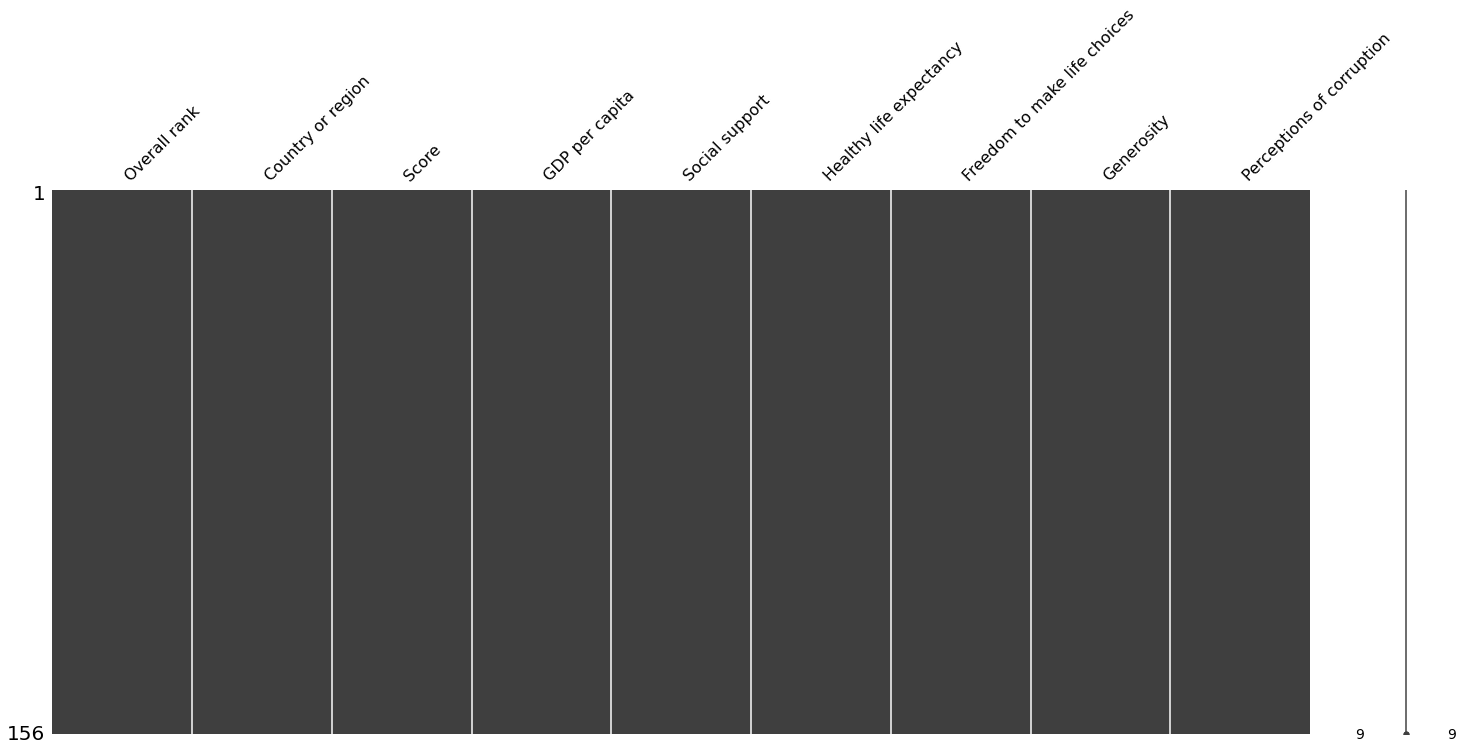

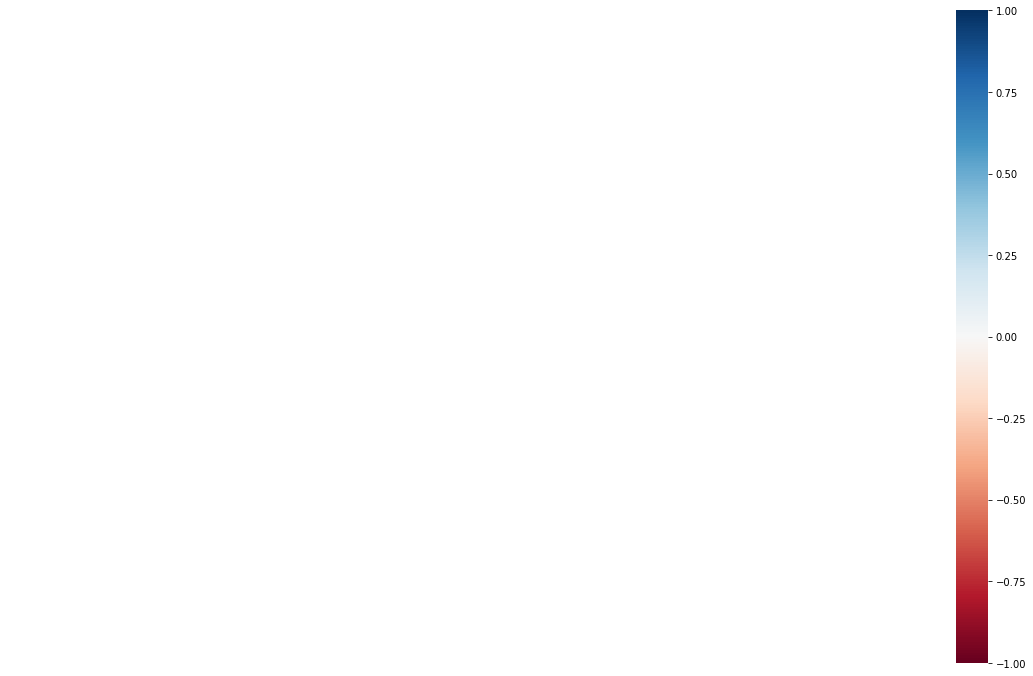

In [73]:
# For Graphical view of missing data
"""The msno.matrix() is a nullity matrix that will help to visualize the location of the null observations."""

import missingno as msno
msno.matrix(df)

# To sort graph using one value
"""The missingno package additionally lets us sort the chart by a selective column. Let's sort the value by one feature name 
column to detect if there is a pattern in the missing values."""

sorted = df.sort_values('feature_name')
msno.matrix(sorted)

# Heatmap for Missing Value
"""msno. heatmap() helps to visualize the correlation between missing features. 
The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the 
presence of another

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not 
appearing have no effect on one another) to 1 (if one variable appears the other definitely also does)"""

msno.heatmap(df)

# Dendrogram for missing value

msno.dendrogram(df)

## Treating Missing values

In [ ]:
# Complete Case Analysis(CCA):
"""This is a quite straightforward method of handling the Missing Data, which directly removes the rows that have missing data 
i.e we consider only those rows where we have complete data i.e data is not missing. This method is also 
popularly known as “Listwise deletion”.

When to Use:-
> Data is MAR(Missing At Random).
> Good for Mixed, Numerical, and Categorical data.
> Missing data is not more than 5% - 6% of the dataset.
> Data doesn't contain much information and will not bias the dataset.
"""

df.dropna(subset=['fature_name'],how='any',axis = 0) # Drop rows which contains any NaN or missing value for feature_name column & for complete df remove subset and how

## Imputations Techniques for non Time Series Problems:

# Arbitrary Value Imputation
"""This is an important technique used in Imputation as it can handle both the Numerical and Categorical variables. 
This technique states that we group the missing values in a column and assign them to a new value that is far away from the range of that column.
Mostly we use values like 99999999 or -9999999 or “Missing” or “Not defined” for numerical & categorical variables.

When to Use:-
> When data is not MAR(Missing At Random).
> Suitable for All.
"""

df['features_name'].fillna('Missing')


# Frequent Category Imputation
""""This technique says to replace the missing value with the variable with the highest frequency or in simple words replacing the values 
with the Mode of that column. This technique is also referred to as Mode

When to Use:-
> Data is Missing at Random(MAR)
> Missing data is not more than 5% - 6% of the dataset.
"""

df['features_name'].fillna(df['features_name'].mode())

## Imputations Techniques for Time Series Problems:

# Imputing using ffill

df.fillna(method='ffill')

# Imputation using bfill

df.fillna(method='bfill')

# Imputation using Linear Interpolation method

"""Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values
 from adjacent data points to compute a value for a missing data point."""

df.interpolate(limit_direction="both")

## Advanced Imputation Techniques:

# Imputation Using k-NN
"""The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses 'feature similarity' to predict 
the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the
training set. This can be very useful in making predictions about the missing values by finding the k's closest neighbours to the 
observation with missing data and then imputing them based on the non-missing values in the neighbourhood.

The fundamental weakness of KNN doesn't work on categorical features. We need to convert them into numeric using any encoding method. 
It requires normalizing data as KNN Imputer is a distance-based imputation method and different scales of data generate biased replacements 
for the missing values.
"""

from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df['feature_name'] = knn_imputer.fit_transform(df[['feature_name']])
df = pd.DataFrame(knn_imputer.fit_transform(df),columns = df.columns) # for whole dataset

# Imputation Using Multivariate Imputation by Chained Equation(MICE)
"""This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single 
imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can
 handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns. 
"""

from impyute.imputation.cs import mice
imputed_training=mice(df.values)

# In sklearn, it is implemented as follows

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice_imputer = IterativeImputer()
df['feature_name'] = mice_imputer.fit_transform(df[['feature_name']])

# Stochastic regression imputation:
"""It is quite similar to regression imputation which tries to predict the missing values by regressing it from other related variables
 in the same dataset plus some random residual value."""

# Extrapolation and Interpolation:
"""It tries to estimate values from other observations within the range of a discrete set of known data points."""

# Hot-Deck imputation:
"""Works by randomly choosing the missing value from a set of related and similar variables."""

# Cold-Deck Imputation: 
"""A systematically chosen value from an individual who has similar values on other variables.This is similar to Hot Deck in most ways,
 but removes the random variation."""

 # Replacing Values using backward & forward filling 

 df.fillna(method = 'bfill', axis=0)

## Outlier Detection and Treatment

In [ ]:
# Box plot outlier detection

for var in 'feature name list':
    sns.boxplot(df[var])
    plt.show()

In [ ]:
# Outlier Treatment

# DELETING OBSERVATIONS:
"""We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. 
We can also use trimming at both ends to remove outliers. But deleting the observation is not a good idea when we have small dataset."""

for var in 'list of feature name' :
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


# TRANSFORMING VALUES:

# Scalling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df['feature_name'] = scaler.fit_transform(df['feature_name'].values.reshape(-1,1))

# Log Transformation
df['feature_name'] = np.log(df['feature_name'])

# Box-transformation
import scipy
df['feature_name'],fitted_lambda= scipy.stats.boxcox(df['feature_name'] ,lmbda=None)

# IMPUTATION
q1 = df['feature_name'].quantile(0.25)
q3 = df['feature_name'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df['feature_name']) # Mean,median,mode
for i in df['feature_name']:
    if i > Upper_tail or i < Lower_tail:
            df['feature_name'] = df['feature_name'].replace(i, m)

# Binning
""" Binning the data and categorizing them will totally avoid the outliers. It will make the data categorical instead."""

df['feature_name'] = pd.cut(df['feature_name'], bins = [0, 10, 20, 30, 40, 55], labels = ['Very Low', 'Low', 'Average', 'High', 'Very High'])

# Quantile based flooring & capping

q10 = df['feature_name'].quantile(0.10)
q90 = df['feature_name'].quantile(0.90)
df["feature_name"] = np.where(df["feature_name"] <q10, q10,df['feature_name'])
df["feature_name"] = np.where(df["feature_name"] >q90, q90,df['feature_name'])


# Winsorizing
"""Unlike trimming, here we replace the outliers with other values. Common is replacing the outliers on the upper side with 95% percentile
 value and outlier on the lower side with 5% percentile."""

import scipy.stats
scipy.stats.mstats.winsorize(df['feature_name'],limits=0.05)

## One Hot encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
feature_col = "list of feature names"
le = LabelEncoder()
for col in feature_col:
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.fit_transform(df_test[col])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse=False,drop = 'if_binary')

transformed_data = onehotencoder.fit_transform(df[['feature_name']])
# the above transformed_data is an array so convert it to dataframe and add feature name to the comlum
encoded_data = pd.DataFrame(transformed_data, columns=onehotencoder.get_feature_names_out())

# now concatenate the original data and the encoded data using pandas
df = pd.concat([df, encoded_data], axis=1).drop('feature_name', axis=1)

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita'>

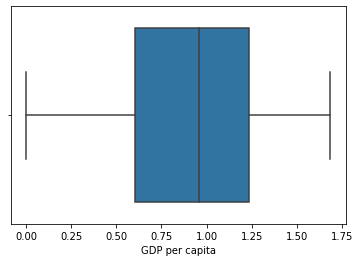

In [ ]:
# Plot 
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs Year Sold")

### To get Unique value column 

In [ ]:
### numerical variables- 2 Types
##1. Continuous variable and Discrete variable

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<=25]
print(len(discrete_feature))
df[discrete_feature].head()

In [ ]:
## Lets find the relationship between Discrete and Sales Price
data=dataset.copy()
for feature in discrete_feature:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    

In [ ]:

numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']

## Continuous Variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+Year_Feature]
print(len(continuous_feature))

## Lets find the relationship between numerical and Sales Price
data = dataset.copy()
for feature in continuous_feature:
    data.groupby(feature)['SalePrice'].median().plot.hist()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


#EDA 2

In [ ]:
## We will be using logarithmic transformation
data=dataset.copy()
for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

In [ ]:
## Outliers 
for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [ ]:
dataset['SalePrice'].hist()

In [ ]:
sns.histplot(dataset['SalePrice'],kde=True)

## Categorical Variables 